In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import warnings
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from  imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [133]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [134]:
df = pd.read_csv("/content/sample_data/creditcard.csv")

In [135]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [137]:
print(df.isnull().sum().to_string())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0


In [138]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


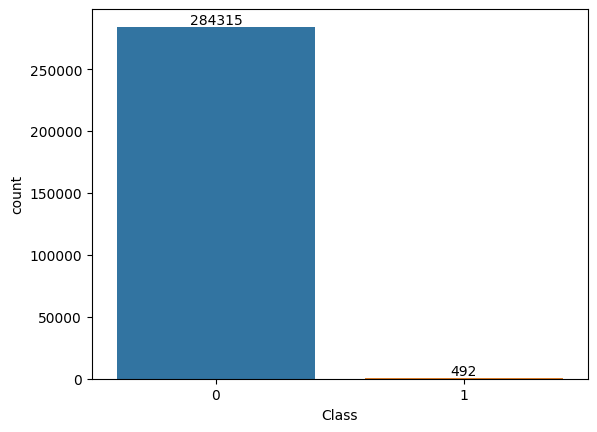

In [139]:
ax = sns.countplot(df, x='Class')
for bar in ax.containers:
  ax.bar_label(bar)

([<matplotlib.patches.Wedge at 0x788feaf5f1f0>,
 [Text(-1.09998380137016, 0.0059696501784341355, ''),
  Text(1.0999838018177286, -0.005969567707642625, '')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.83%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.17%')])

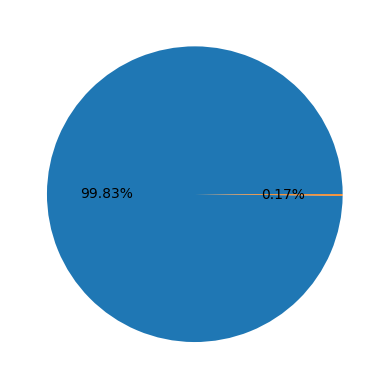

In [140]:
plt.pie(df['Class'].value_counts(), autopct="%1.2f%%")

In [141]:
columns_1 = np.array([['V1', 'V2', 'V3'],
          ['V4', 'V5', 'V6'],
          ['V7', 'V8', 'V9'],
          ['V10', 'V11', 'V12'],
          ['V13', 'V14', 'V15']])
columns_2 = np.array([['V16', 'V17', 'V18'],
          ['V19', 'V20', 'V21'],
          ['V22', 'V23', 'V24'],
          ['V25', 'V26', 'V27'],
          ['V28', 'Time', 'Amount']])
axes = np.empty([5, 3])

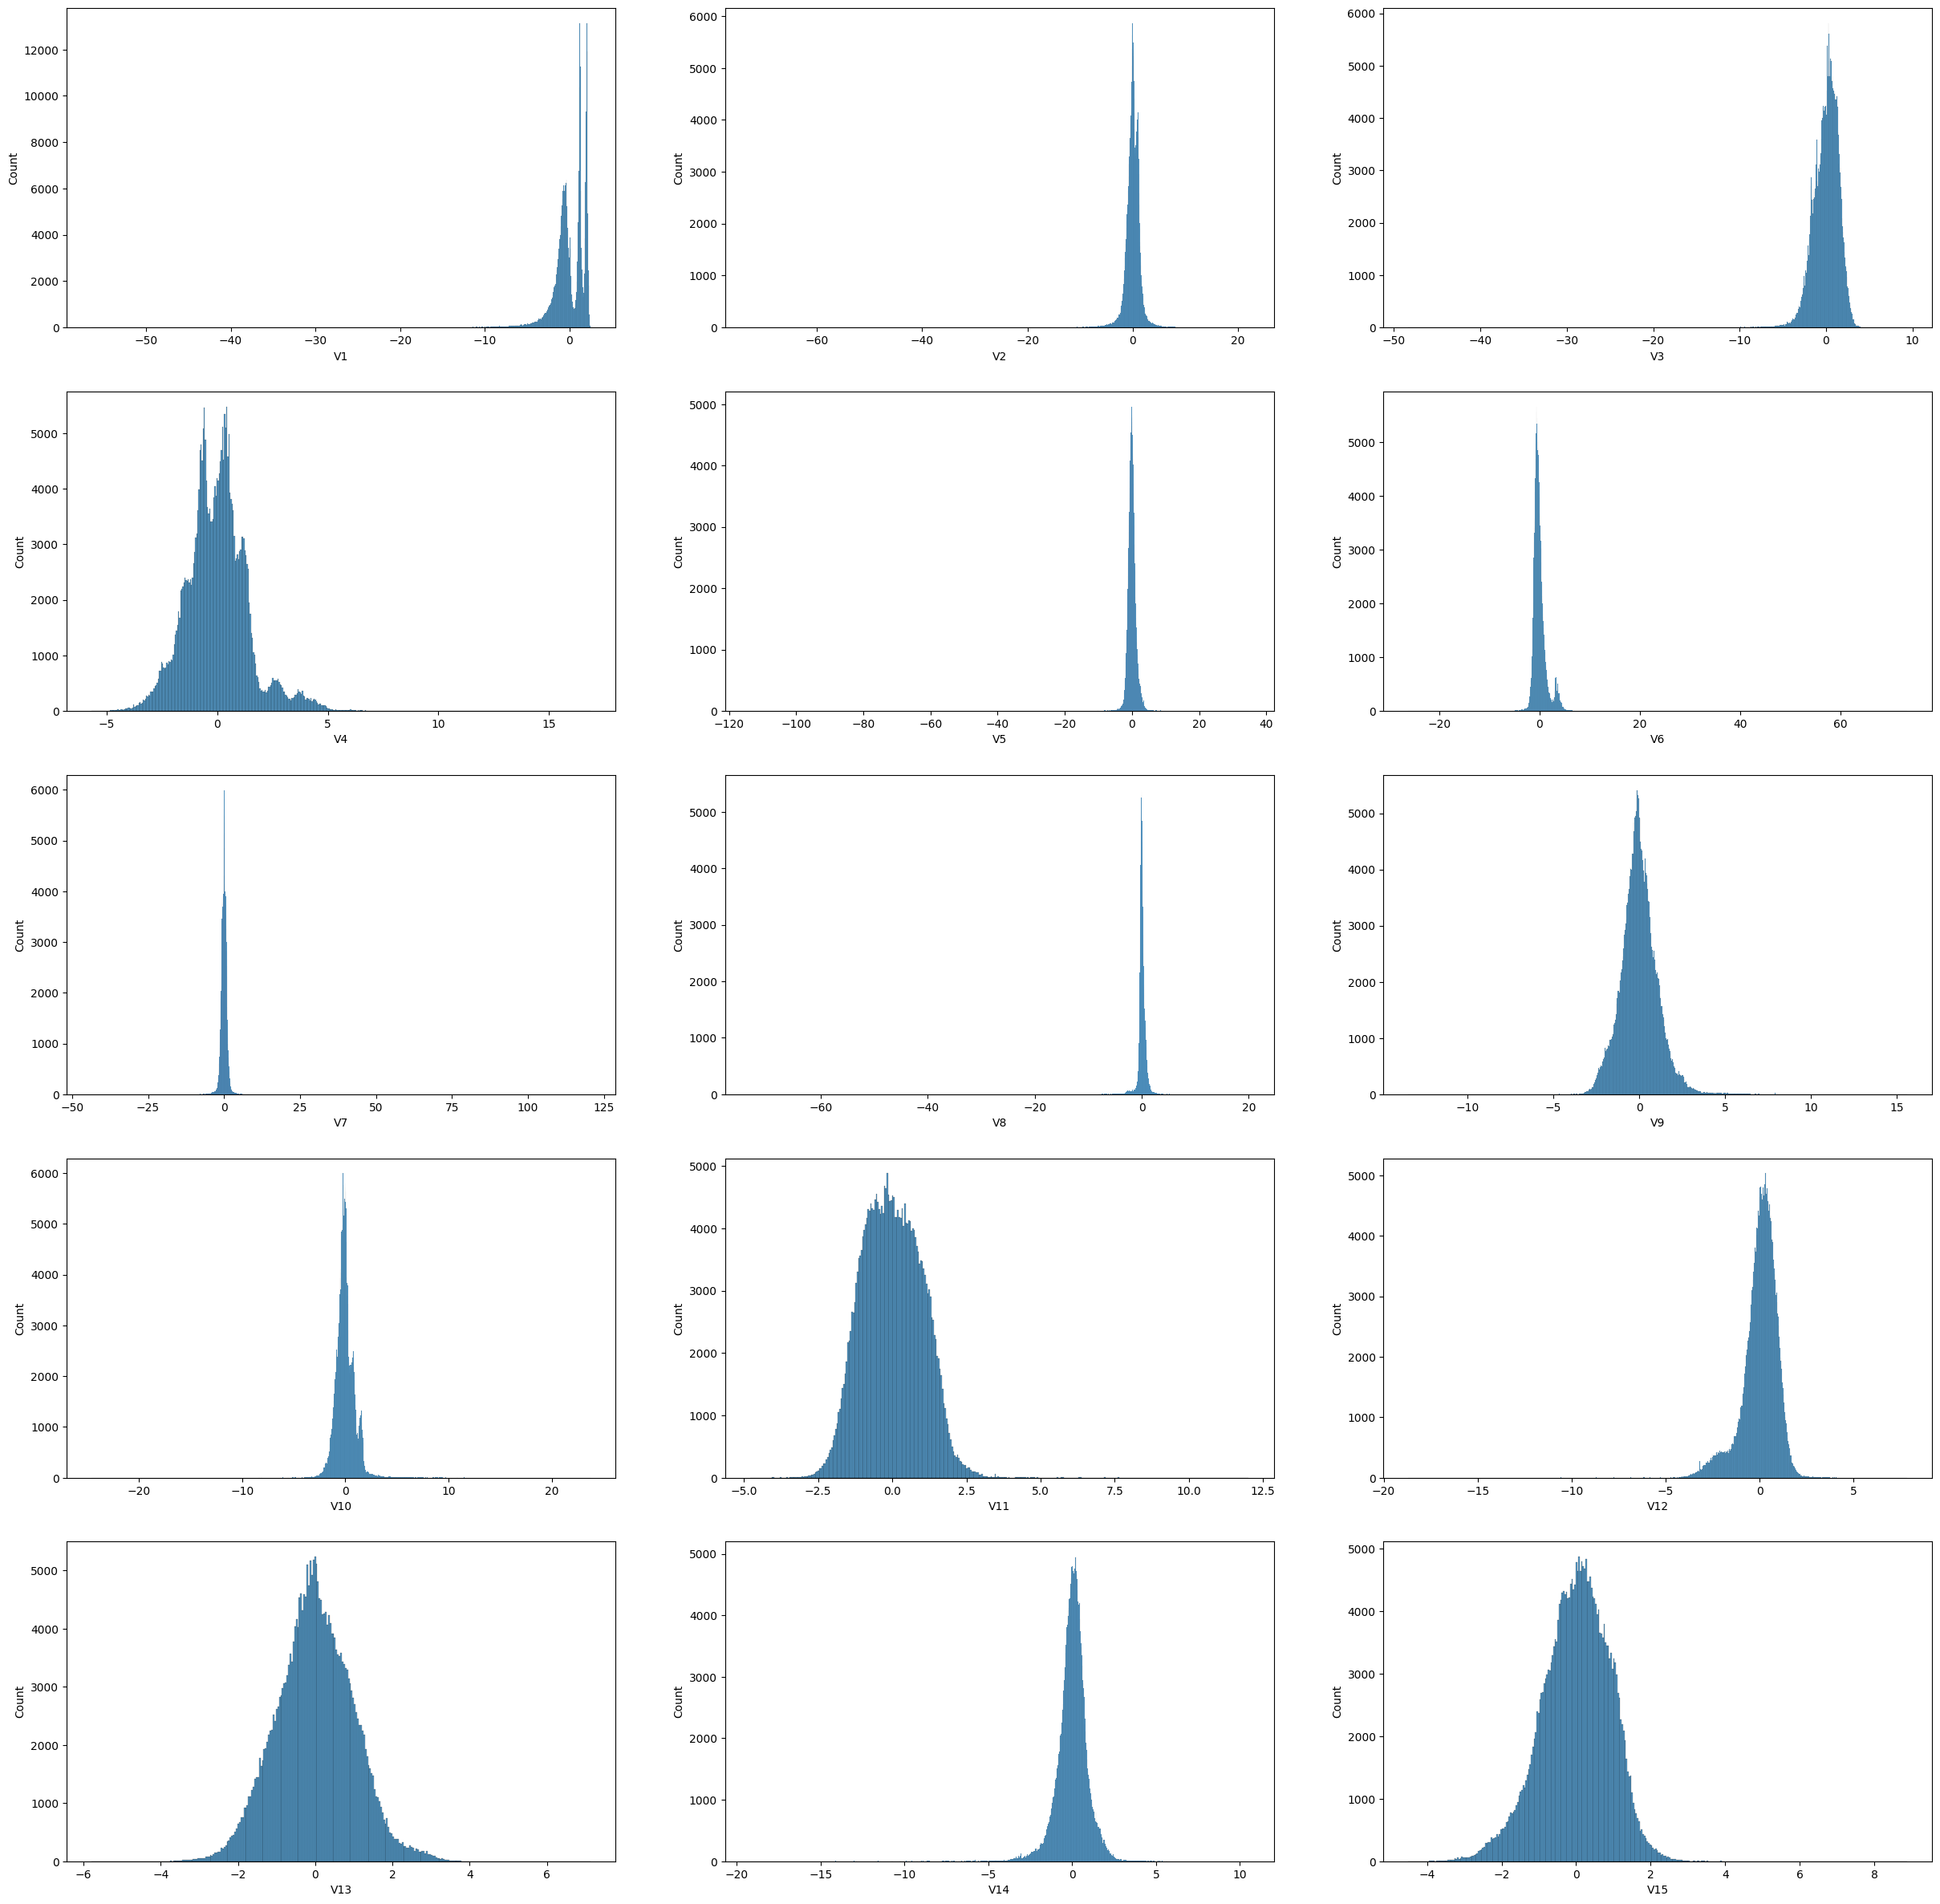

In [142]:
fig, axes = plt.subplots(5, 3, figsize=(30, 30))
for i in range(columns_1.shape[0]):
  for j in range(columns_1.shape[1]):
    ax = sns.histplot(ax=axes[i][j], data=df, x=columns_1[i][j])

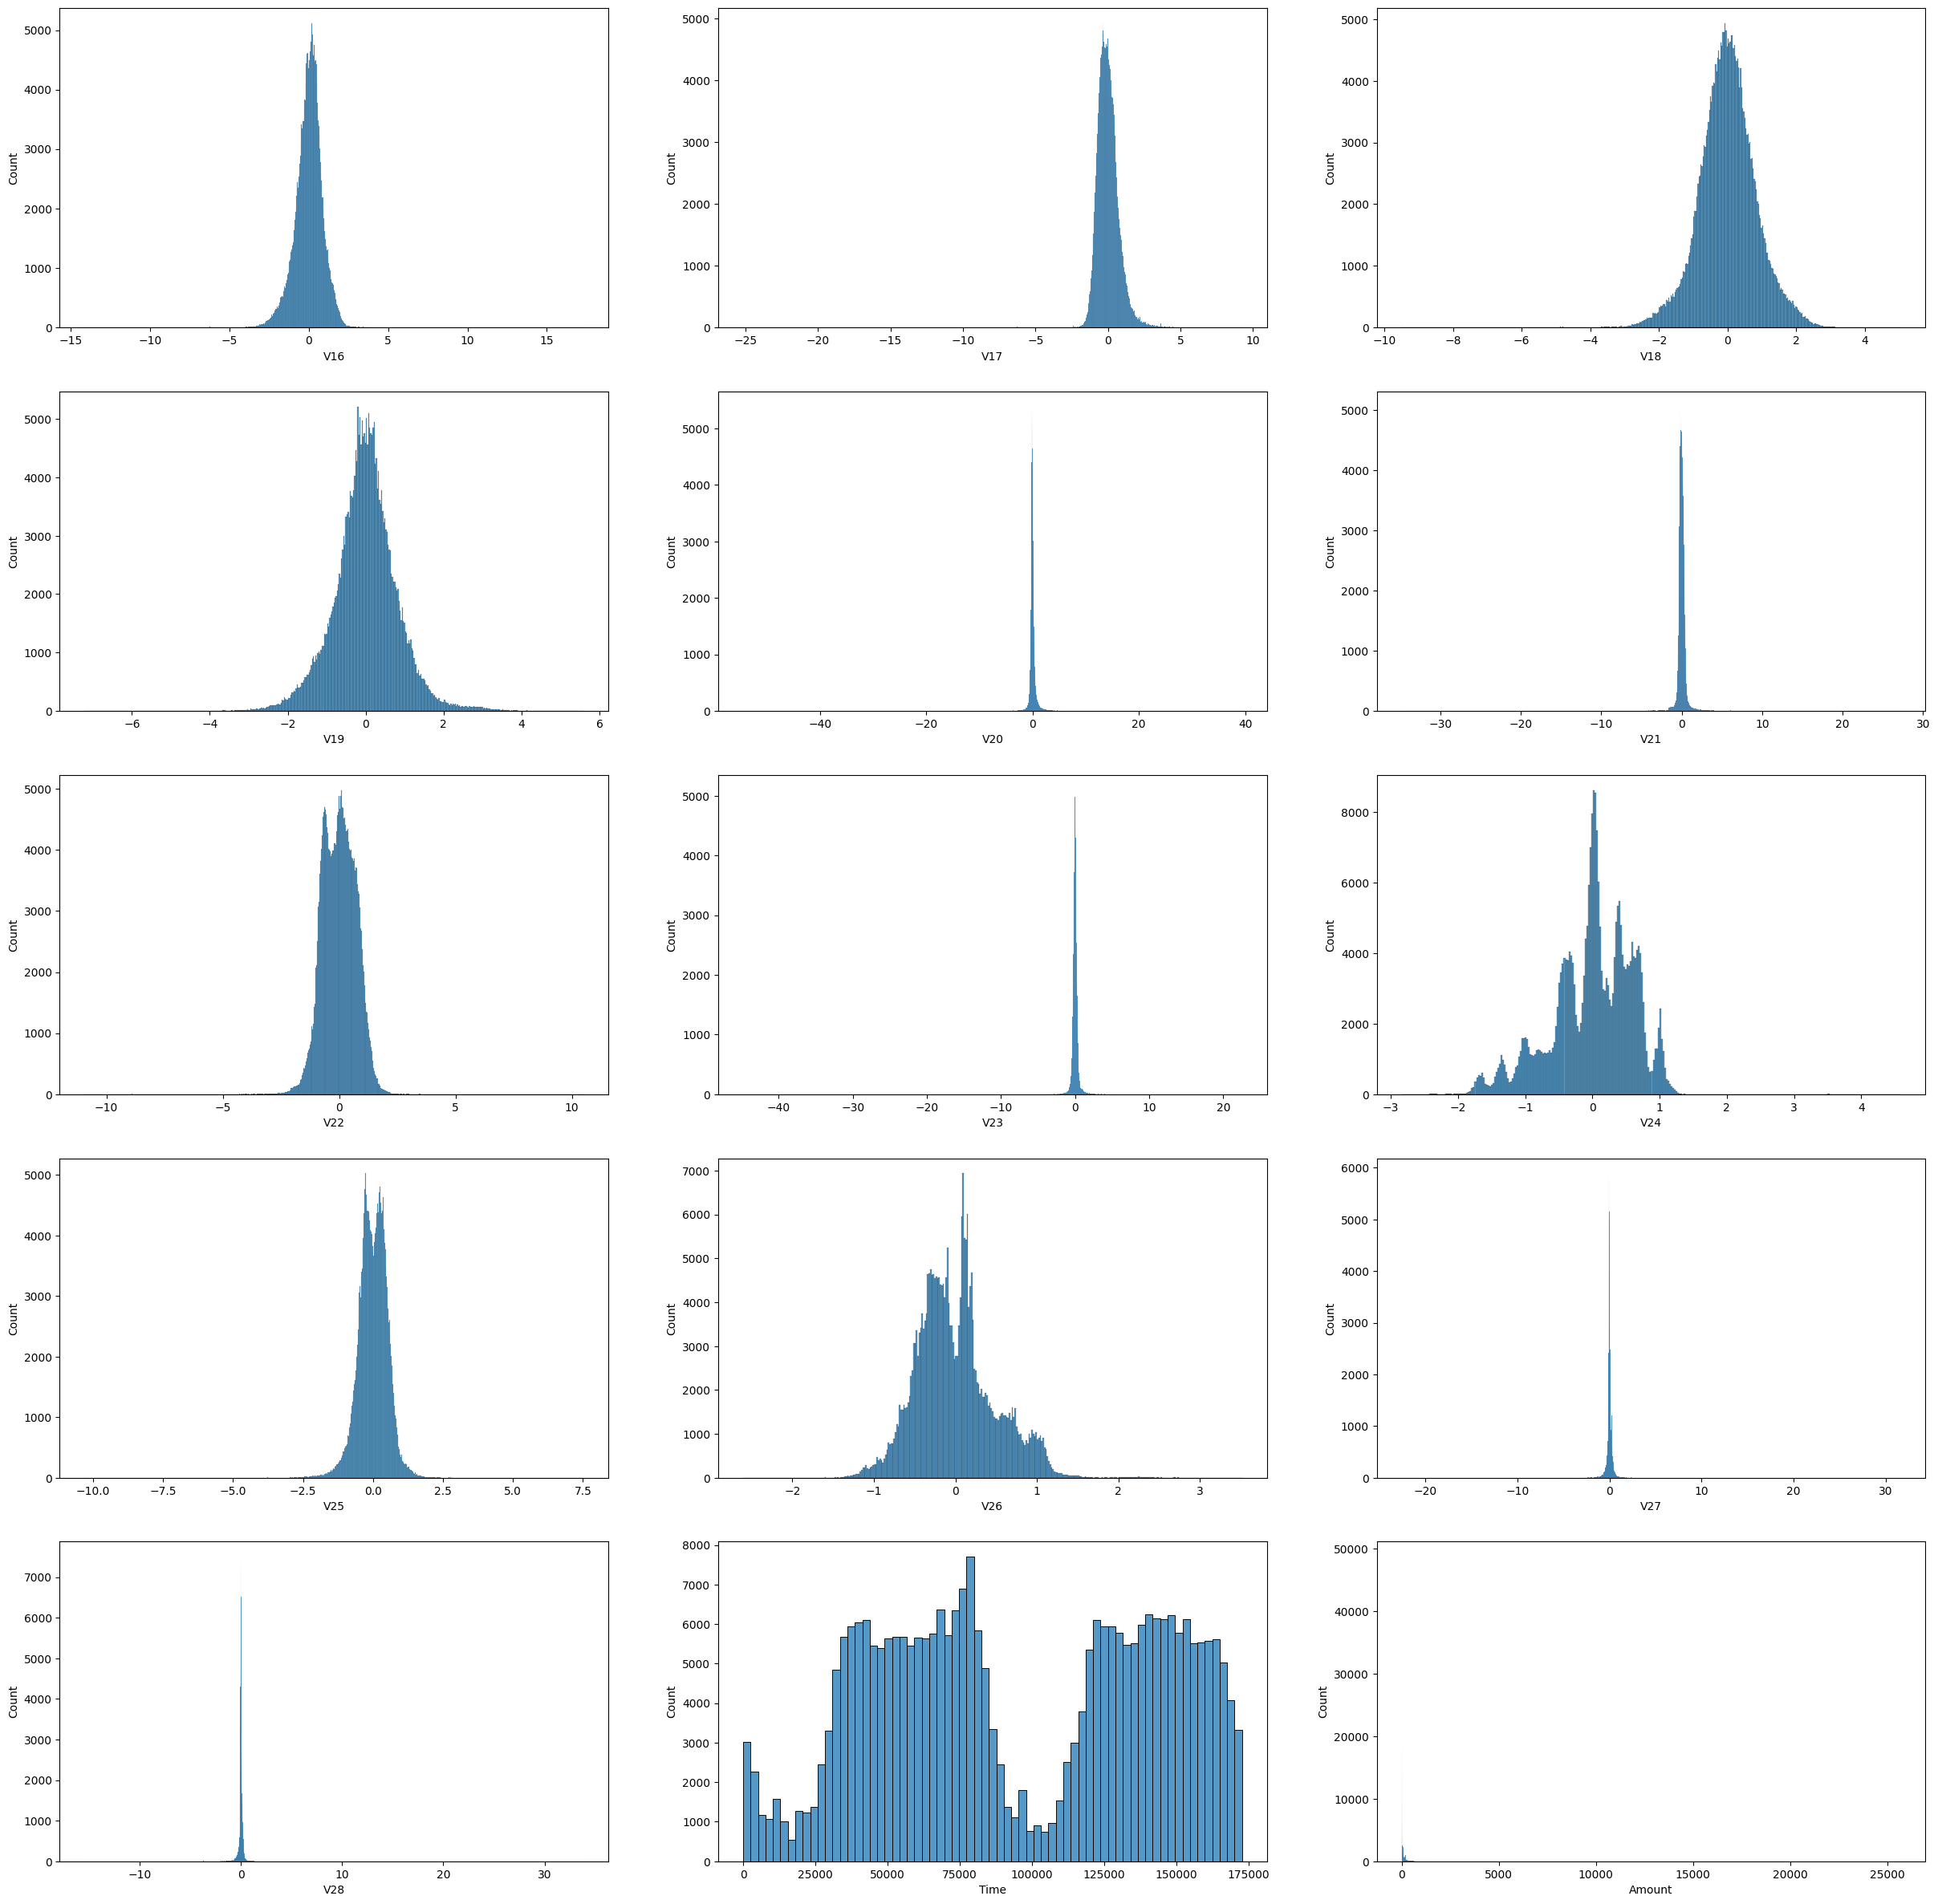

In [143]:
fig, axes = plt.subplots(5, 3, figsize=(30, 30))
for i in range(columns_2.shape[0]):
  for j in range(columns_2.shape[1]):
    ax = sns.histplot(ax=axes[i][j], data=df, x=columns_2[i][j])

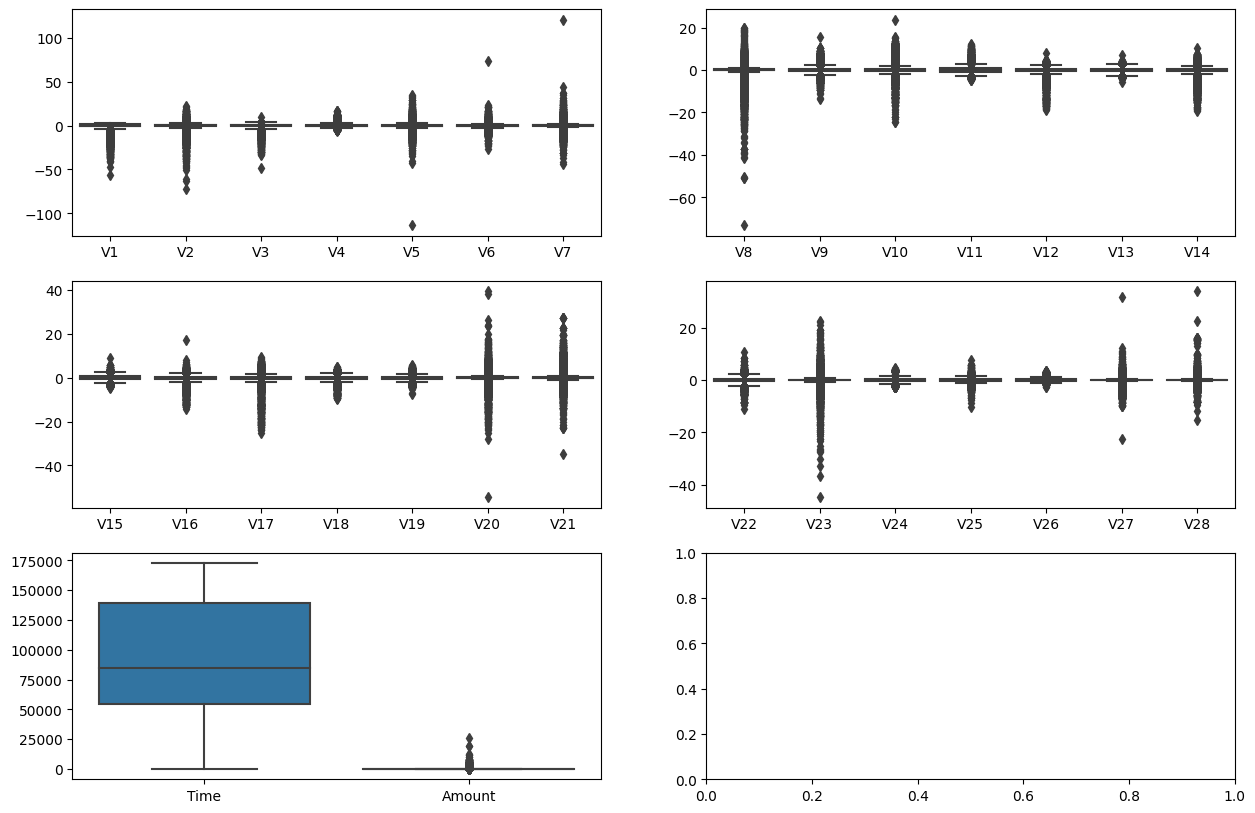

In [144]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize=(15, 10))
sns.boxplot(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']], ax=ax1)
sns.boxplot(df[['V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']], ax=ax2)
sns.boxplot(df[['V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21']], ax=ax3)
sns.boxplot(df[['V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']], ax=ax4)
ax = sns.boxplot(df.loc[:, ['Time', 'Amount']], ax=ax5)

In [145]:
for column in df.loc[:, 'V1':'Amount'].columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  threshold = 1.5
  outliers = df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)]
  print(f'Percentage of outliers in {column}: {len(outliers.index)/len(df.index) * 100}')
df.drop(outliers.index, inplace=True)
print(len(df))

Percentage of outliers in V1: 2.4795738868777804
Percentage of outliers in V2: 4.7491810243428
Percentage of outliers in V3: 1.1807996292225964
Percentage of outliers in V4: 3.9142296362097846
Percentage of outliers in V5: 4.316958501722219
Percentage of outliers in V6: 8.063355184388024
Percentage of outliers in V7: 3.1417767119487934
Percentage of outliers in V8: 8.47380857914307
Percentage of outliers in V9: 2.9082852598426303
Percentage of outliers in V10: 3.334187713082895
Percentage of outliers in V11: 0.27386967314707855
Percentage of outliers in V12: 5.3889124916171305
Percentage of outliers in V13: 1.182555204050462
Percentage of outliers in V14: 4.96792564789489
Percentage of outliers in V15: 1.0161267103687759
Percentage of outliers in V16: 2.873524878250886
Percentage of outliers in V17: 2.605273044552978
Percentage of outliers in V18: 2.644949035662747
Percentage of outliers in V19: 3.5831282236742776
Percentage of outliers in V20: 9.750462593967143
Percentage of outliers 

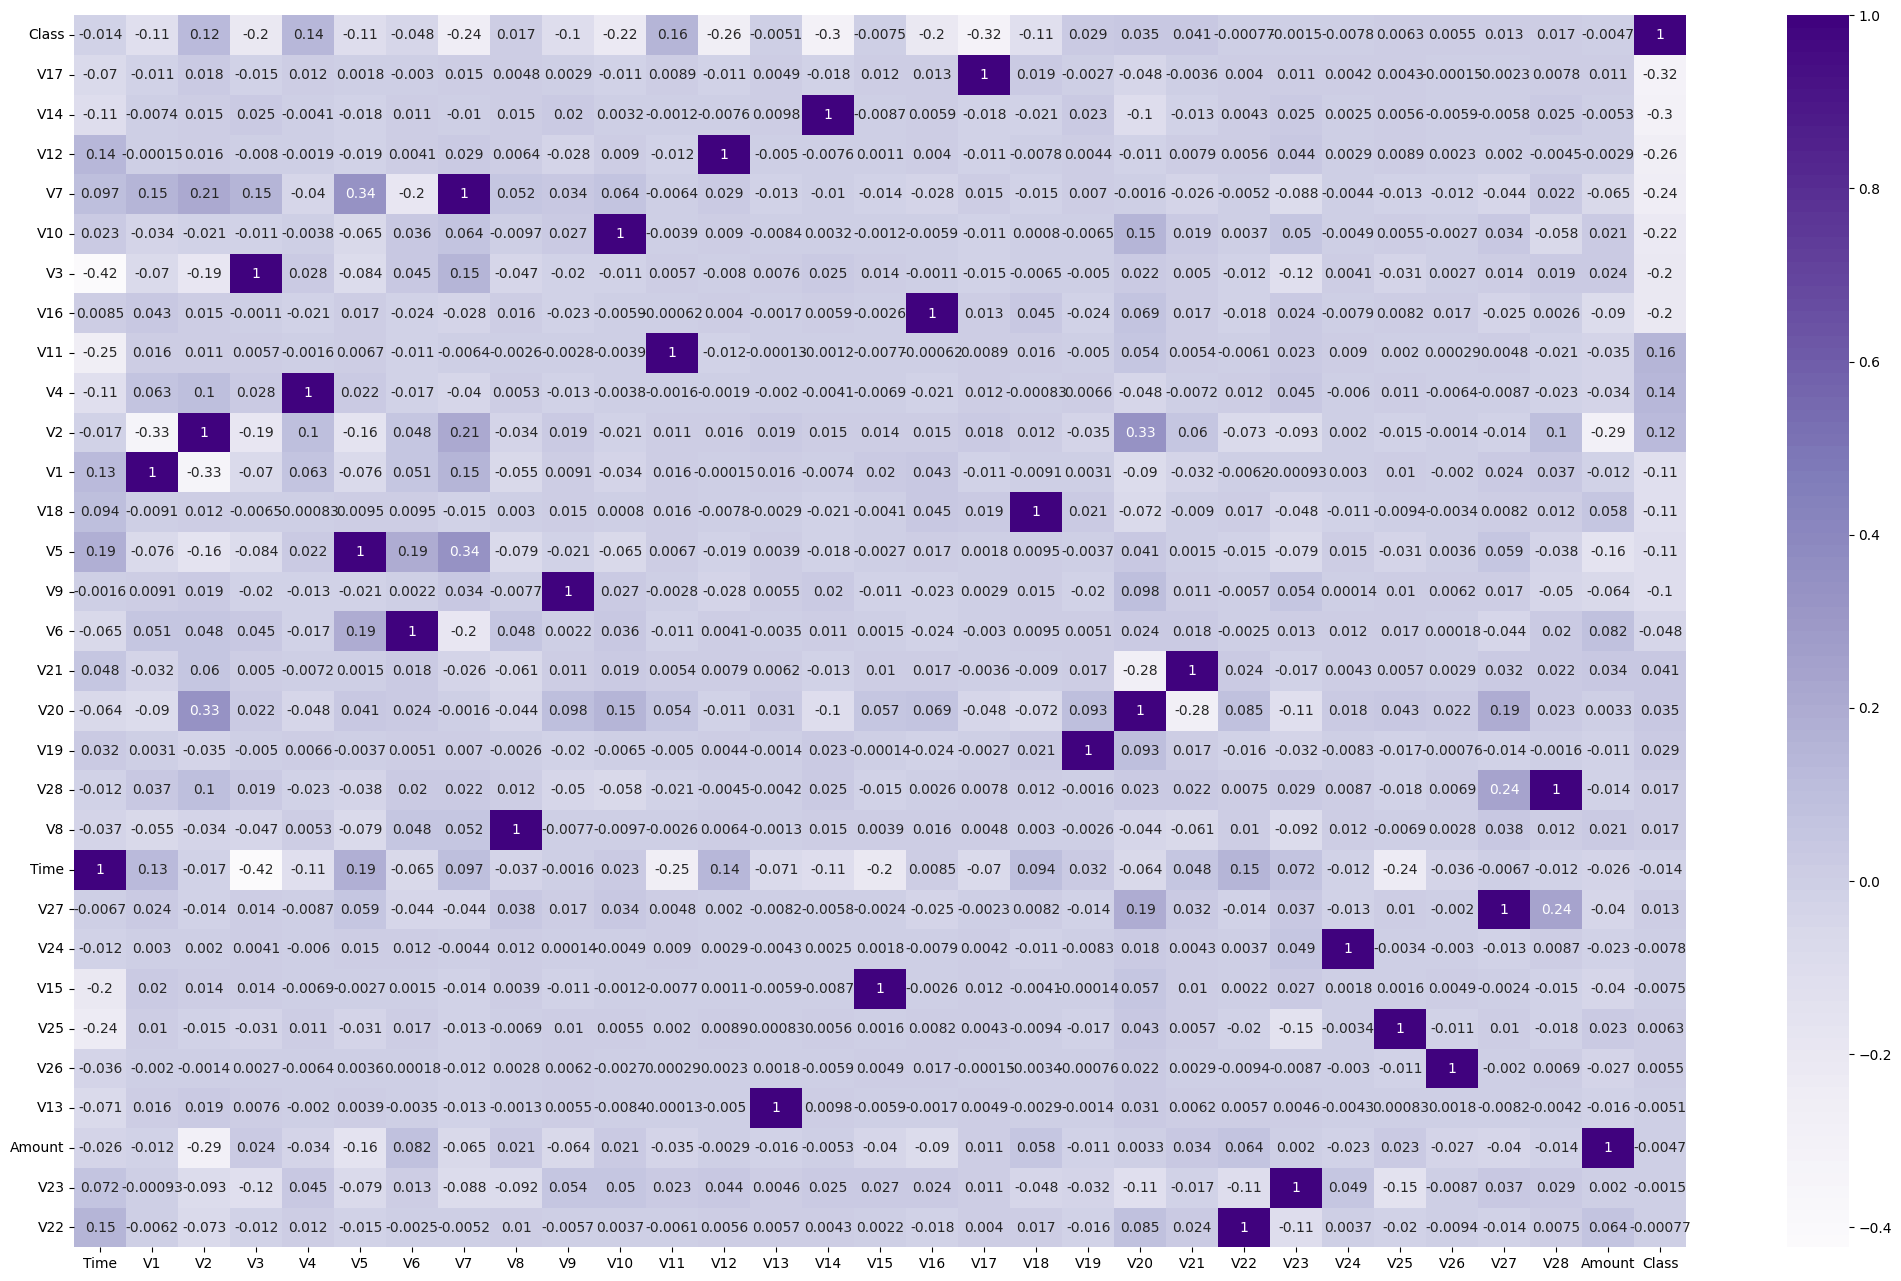

In [146]:
fig, ax = plt.subplots(figsize=(26, 16))
corr = df.corr()
ax = sns.heatmap(corr.sort_values(by=['Class'], ascending=False, key=abs),
                 cmap=sns.color_palette("Purples", 100), annot=True)

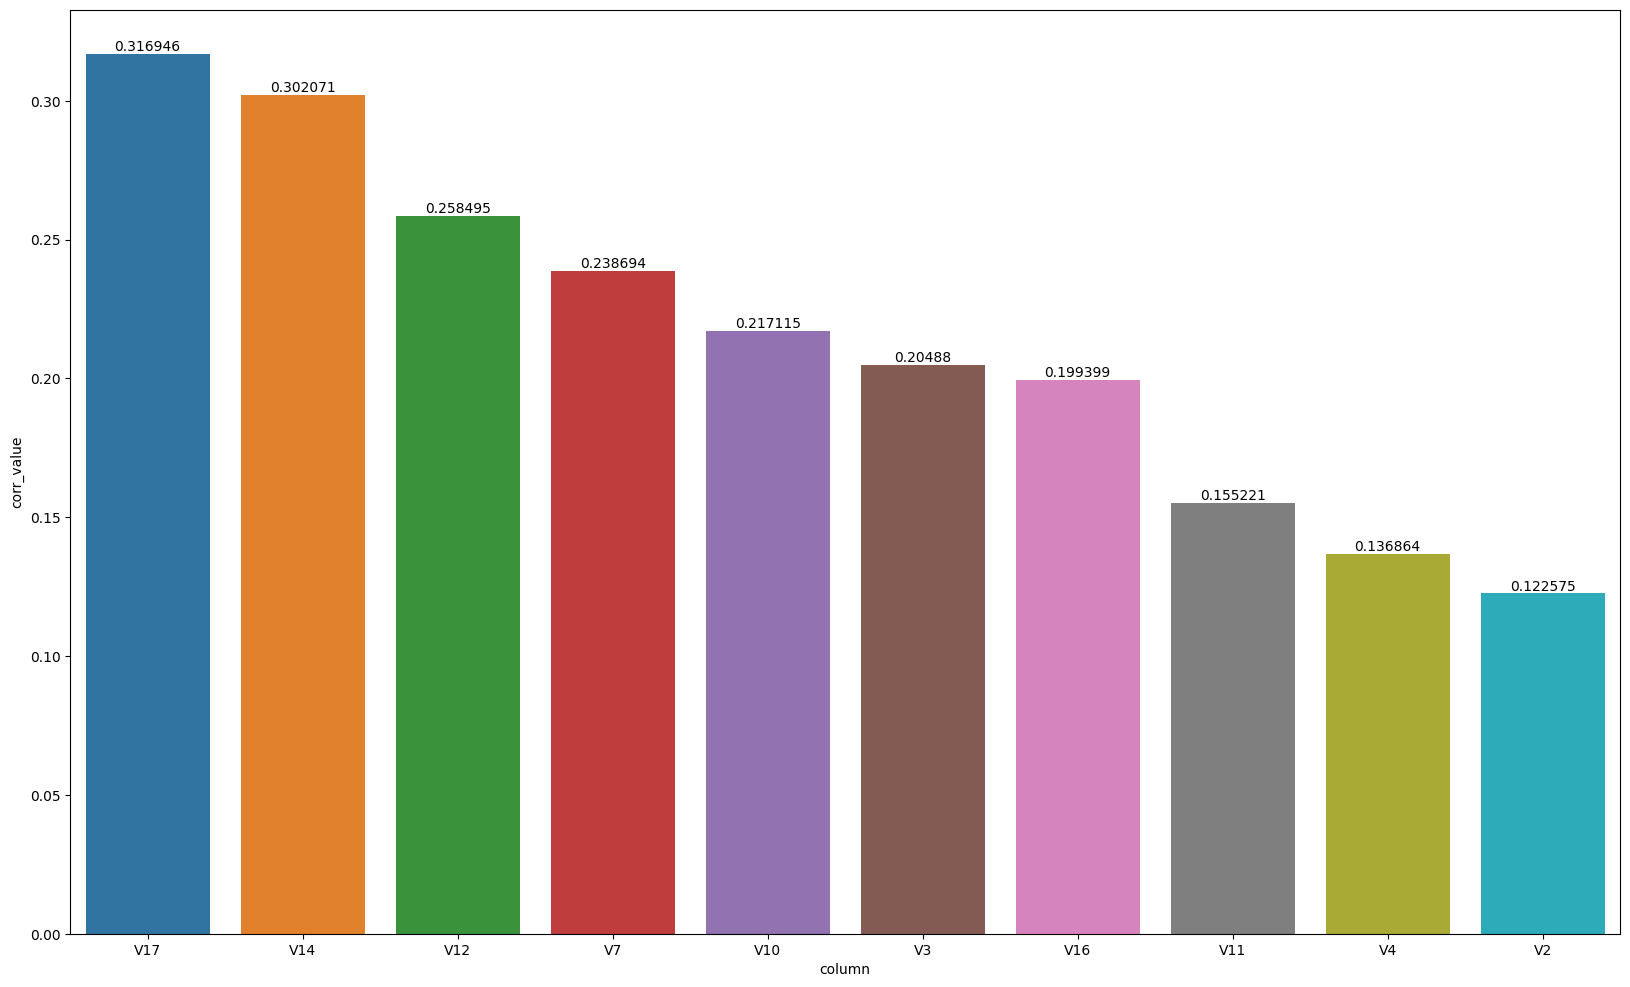

In [147]:
corr = df.corrwith(df["Class"])
corr_df = pd.DataFrame()
corr_df['column'] = corr.index
corr_df['corr_value'] = abs(corr.values)
corr_df = corr_df[corr_df['column'] != 'Class']
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.barplot(corr_df.sort_values(by=['corr_value'], ascending=False, key=abs).head(10), x='column', y='corr_value')
for bar in ax.containers:
  ax.bar_label(bar)

In [148]:
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [149]:
x = df.drop('Class', axis=1)
y = df['Class']

In [150]:
strat_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in strat_k_fold.split(x, y):
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [151]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

In [152]:
df = df.sample(frac=1)
row_num = len(df[df['Class'] == 1])
print(f"Number of rows in the less dominant class: {row_num}")
fraud_df = df[df['Class'] == 0].iloc[:row_num, :]
non_fraud_df = df[df['Class'] == 1]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
df = normal_distributed_df.sample(frac=1, random_state=42)
df.head()

Number of rows in the less dominant class: 401


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29732,-0.581194,-0.500636,0.218099,0.913467,-1.146900,-0.377364,-0.436468,1.159889,-0.007674,0.047516,...,-0.150797,-0.675056,0.509085,0.147131,-0.660473,-1.136150,0.155656,0.169646,3.031648,0
226132,0.699133,-1.259001,0.886330,1.534962,-1.226355,0.082346,0.870415,-0.141729,1.009023,0.238738,...,-0.079200,-0.204475,-0.107776,-1.094218,0.100757,-0.025007,0.197325,0.049970,-0.283516,0
26749,-0.597372,-1.329524,-1.673427,3.178089,2.077252,-0.430172,0.993901,-1.888304,0.455303,-0.001358,...,-0.359869,0.256603,-0.290624,0.265253,-0.575780,0.070409,0.235366,-0.172799,1.182418,0
42936,-0.514224,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,...,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,0.960000,1
120837,-0.106558,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,...,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,1.843956,1


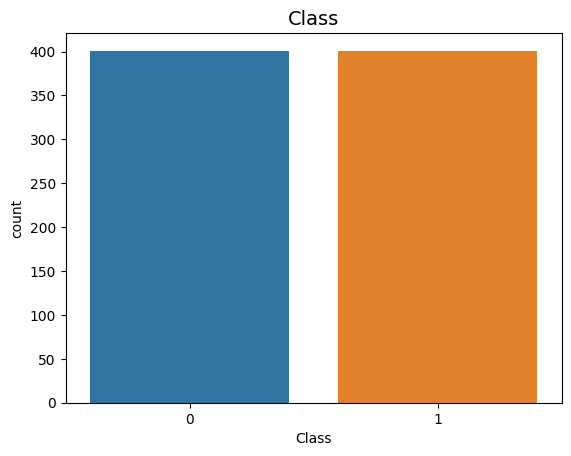

In [153]:
sns.countplot(df, x='Class')
plt.title('Class', fontsize=14)
plt.show()

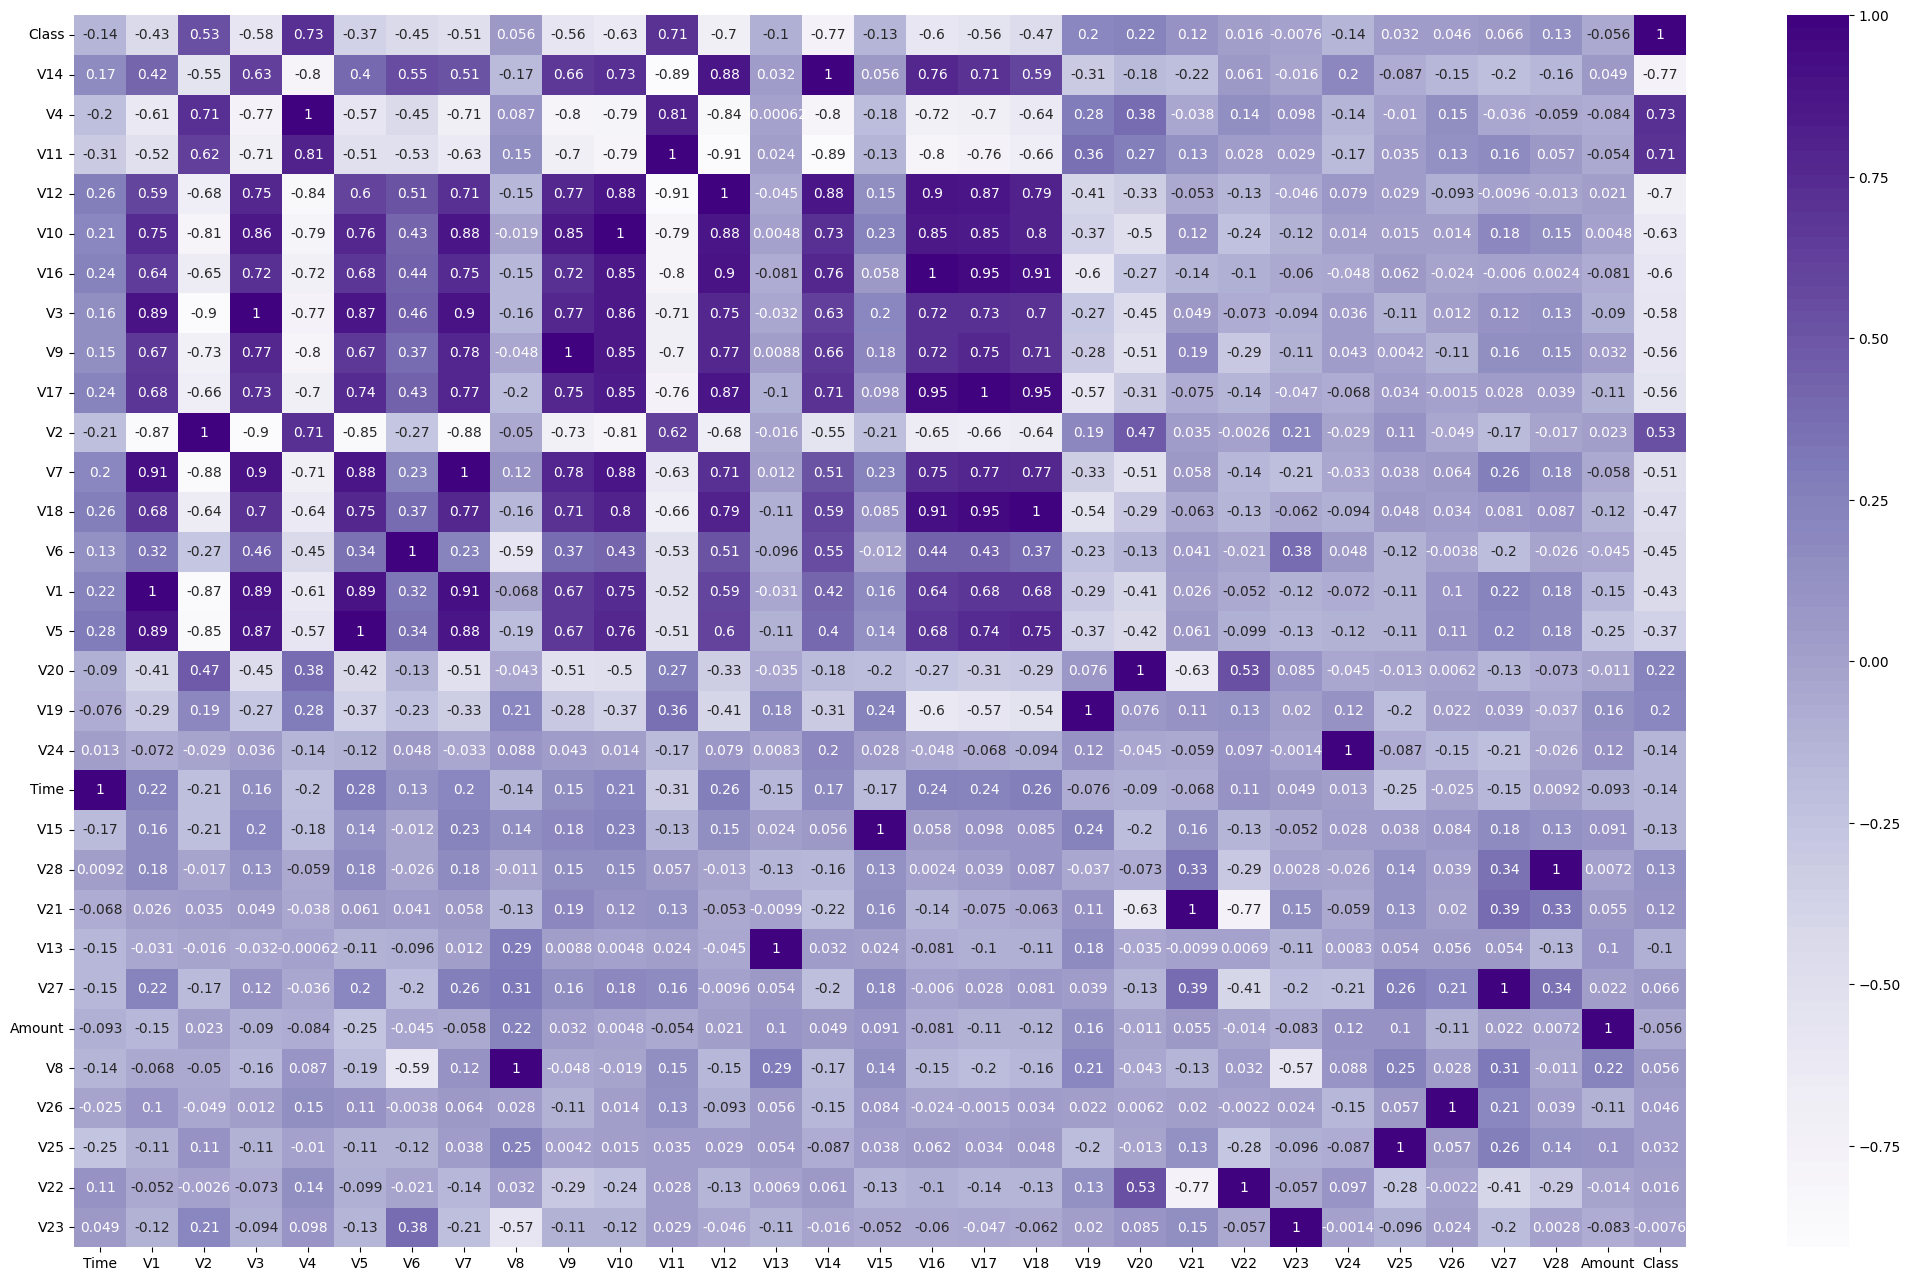

In [154]:
fig, ax = plt.subplots(figsize=(26, 16))
corr = df.corr()
ax = sns.heatmap(corr.sort_values(by=['Class'], ascending=False, key=abs),
                 cmap=sns.color_palette("Purples", 100), annot=True)

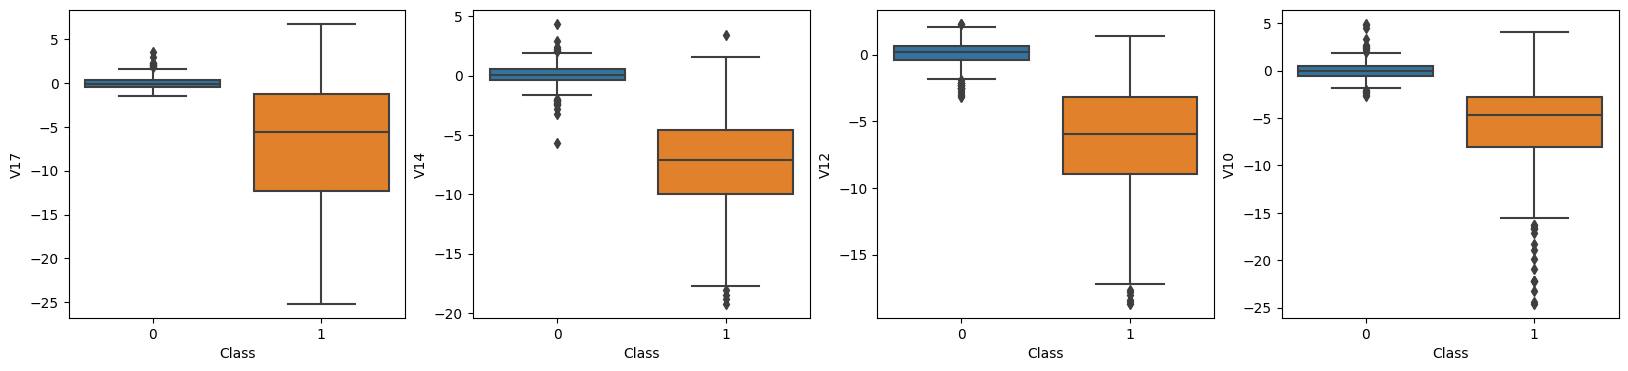

In [155]:
_, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(df, x="Class", y="V17", ax=axes[0])
sns.boxplot(df, x="Class", y="V14", ax=axes[1])
sns.boxplot(df, x="Class", y="V12", ax=axes[2])
sns.boxplot(df, x="Class", y="V10", ax=axes[3])
plt.show()

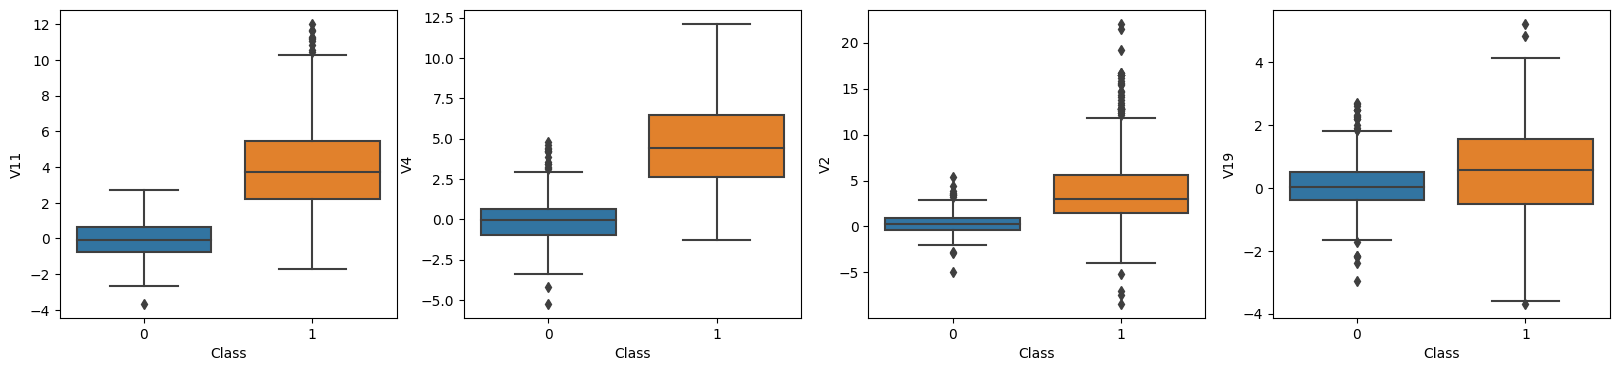

In [156]:
_, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(df, x="Class", y="V11", ax=axes[0])
sns.boxplot(df, x="Class", y="V4", ax=axes[1])
sns.boxplot(df, x="Class", y="V2", ax=axes[2])
sns.boxplot(df, x="Class", y="V19", ax=axes[3])
plt.show()

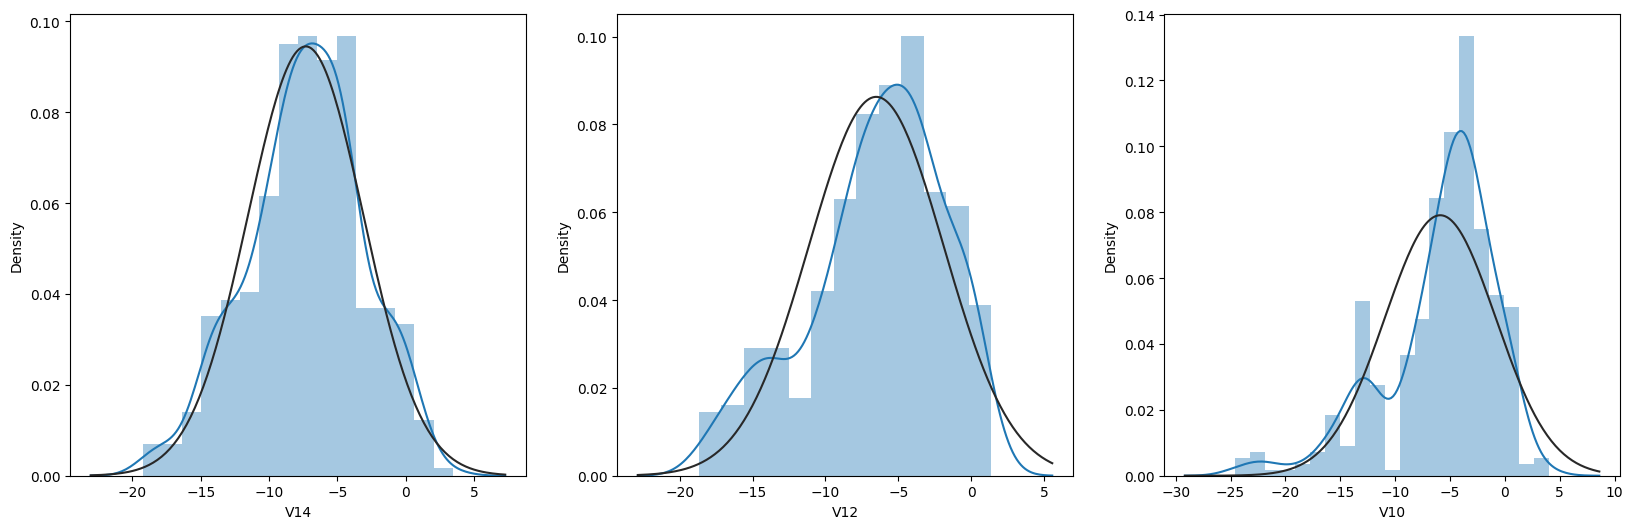

In [157]:
_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
sns.distplot(df[df['Class'] == 1]['V14'],ax=ax1, fit=norm)
sns.distplot(df[df['Class'] == 1]['V12'],ax=ax2, fit=norm)
sns.distplot(df[df['Class'] == 1]['V10'],ax=ax3, fit=norm)
plt.show()

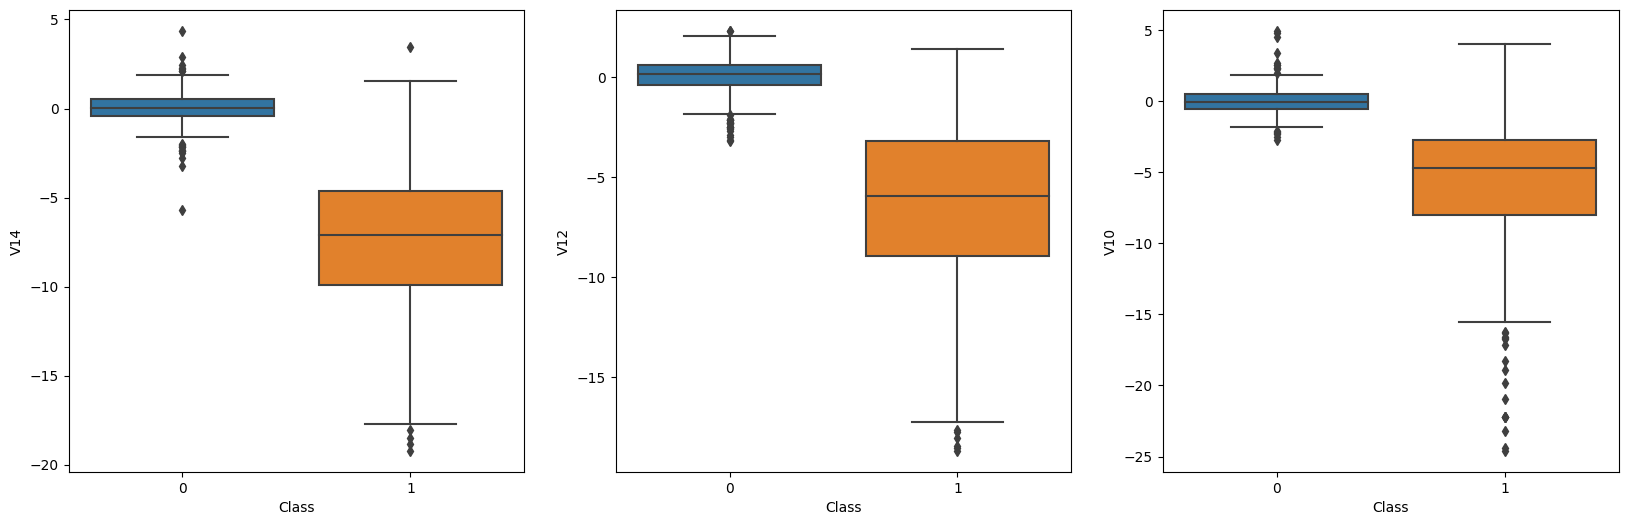

In [158]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(df, x="Class", y="V14",ax=ax1)
sns.boxplot(df, x="Class", y="V12", ax=ax2)
sns.boxplot(df, x="Class", y="V10", ax=ax3)
plt.show()

In [159]:
x = df.drop('Class', axis=1)
y = df['Class']

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [161]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [162]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print(f"Classifiers: {classifier.__class__.__name__} Has a training score of {round(training_score.mean(), 2) * 100}% accuracy score")

Classifiers: LogisticRegression Has a training score of 94.0% accuracy score
Classifiers: KNeighborsClassifier Has a training score of 94.0% accuracy score
Classifiers: SVC Has a training score of 94.0% accuracy score
Classifiers: DecisionTreeClassifier Has a training score of 89.0% accuracy score


In [163]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_

knearest_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knearest = GridSearchCV(KNeighborsClassifier(), knearest_params)
grid_knearest.fit(x_train, y_train)
knearest_neighbors = grid_knearest.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
svc = grid_svc.best_estimator_

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
tree_clf = grid_tree.best_estimator_

In [164]:
for key, classifier in classifiers.items():
    pred = classifier.predict(x_test)
    print(f"{classifier.__class__.__name__}: {accuracy_score(y_test, pred)}")
    print(classification_report(y_test, pred))
    print("*"*20)

LogisticRegression: 0.9565217391304348
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        98
           1       0.92      0.97      0.95        63

    accuracy                           0.96       161
   macro avg       0.95      0.96      0.95       161
weighted avg       0.96      0.96      0.96       161

********************
KNeighborsClassifier: 0.968944099378882
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.98      0.94      0.96        63

    accuracy                           0.97       161
   macro avg       0.97      0.96      0.97       161
weighted avg       0.97      0.97      0.97       161

********************
SVC: 0.9813664596273292
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       1.00      0.95      0.98        63

    accuracy                         

In [165]:
log_reg_score = cross_val_score(log_reg, x_train, y_train, cv=5)
print(f"Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%")

knearest_score = cross_val_score(knearest_neighbors, x_train, y_train, cv=5)
print(f"Knearest Neighbors Cross Validation Score: {round(knearest_score.mean() * 100, 2)}%")

svc_score = cross_val_score(svc, x_train, y_train, cv=5)
print(f"Support Vector Classifier Cross Validation Score: {round(svc_score.mean() * 100, 2)}%")

tree_score = cross_val_score(tree_clf, x_train, y_train, cv=5)
print(f"Decision Tree Classifier Cross Validation Score: {round(tree_score.mean() * 100, 2)}%")

Logistic Regression Cross Validation Score: 94.38%
Knearest Neighbors Cross Validation Score: 94.69%
Support Vector Classifier Cross Validation Score: 94.22%
Decision Tree Classifier Cross Validation Score: 92.35%
